In [3]:
# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2

# Importing useful packages e
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

from ipywidgets import interact, interactive, fixed, interact_manual

import modelproject_B as mpy

# Er nedenstående nødvendige?
from numpy import array
from scipy import linalg
from scipy import optimize

# Sympy package helps writing  

sm.init_printing(use_unicode=True)

from sympy import *

In [4]:
# Defining the elements in the firms choice

a = sm.symbols('a')
b = sm.symbols('b')
qa, qb = sm.symbols('q_a q_b') 
k = sm.symbols('k')

In [12]:
# We start by defining the linear demand function:
def p_total(qa,qb,a,b):
    return (a-b*(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return ((k/2)*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,a,b,k):
    return (p_total(qa,qb,a,b) * qb - c_B(qb,k))

In [13]:
#We will now find the derivative, for which we will use to find the best response functions

foc_a = diff(profit_A(qa,qb,a,b,k),qa)
foc_b = diff(profit_B(qa,qb,a,b,k),qb)
display(foc_a,foc_b)

In [14]:
#We find the best responsefunctions by isolating respectively qa and qb in the above found derivatives
sola = sm.solve(sm.Eq(foc_a,0),qa)[0]
solb = sm.solve(sm.Eq(foc_b,0),qb)[0]
#solb
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )


 Firm A's best response is given by: q_a = (a - b*q_b)/(2*b + k) and firm B's best response is given by: q_b =(a - b*q_a)/(2*(b + k))


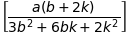

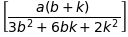

In [15]:
#To find the quantity firm A wants to produce we substitute firm B's best response function into firm A's best reponse and then solve for q_a 
sola_subs = foc_a.subs(qb,solb) #substituting the best response function of firm B into the FOC of firm A
sola_subs
q_astar = solve(sola_subs,qa) #Solving for q_a
solb_subs = foc_b.subs(qa,sola) #substituting the best response function of firm A into the FOC of firm B
q_bstar = solve(solb_subs,qb) #Solving for q_b
display ( q_astar, q_bstar) #Showing the optimal quantities


In [20]:
#We are now able to find the prices the firms will take for the good and the profit each firm get:

#As the above quantities is given as lists we start by defining/converting the list into a float:
type(q_astar)
qqa=q_astar[0]
qqb=q_bstar[0]
#We can now find the price of the good:
print("\n The price of the good: " + str(p_total(qqa,qqb,a,b)) ) 

#We can now find the profit of each firm:
print("\n The profit of A: " + str(simplify(profit_A(qqa,qqb,a,b,k))))
print("\n The profit of B: " + str(simplify(profit_B(qqa,qqb,a,b,k))))


 The price of the good: a - b*(a*(b + k)/(3*b**2 + 6*b*k + 2*k**2) + a*(b + 2*k)/(3*b**2 + 6*b*k + 2*k**2))

 The profit of A: a**2*(b + 2*k)*(6*b**2 + 12*b*k - 2*b*(2*b + 3*k) + 4*k**2 - k*(b + 2*k))/(2*(3*b**2 + 6*b*k + 2*k**2)**2)

 The profit of B: a**2*(b + k)*(3*b**2 + 6*b*k - b*(2*b + 3*k) + 2*k**2 - k*(b + k))/(3*b**2 + 6*b*k + 2*k**2)**2


## Numerical Solution 

We will now show the numerical solution for two firms using the functions from modelproject.py. The functions are based on the analytical solution. We will simplyfy the settings by assuming same cost function: cost = k*qi .  

In [24]:
#We start by finding the analytics solution for firm i under symmetric cost function
k = sm.symbols('k')
a = sm.symbols('a')
b = sm.symbols('b')
N= sm.symbols('n') # Number of firms 
qi = sm.symbols('q_i') #quantity of the N firm 

Solution = mpy.solution_cournot(N,qi,a,b,k)
print('\n The total quantity is: ' + str(Solution[1]))
print('\n The price is: ' + str(Solution[2]))
print('\n The quantity for firm i is: ' + str(Solution[3]))
print('\n The the profit for firm i is: ' + str(Solution[4]))  



 The total quantity is: n*(a - k)/(b*(n + 1))

 The price is: a - n*(a - k)/(n + 1)

 The quantity for firm i is: (a - k)/(b*(n + 1))

 The the profit for firm i is: (a**2 - 2*a*k + k**2)/(b*(n**2 + 2*n + 1))



 The total quantity is: 18.81

 The price is: 1.19

 The quantity for firm i is: 0.19

 The the profit for firm i is: 0.04

 The quantity for perfect competition: 19


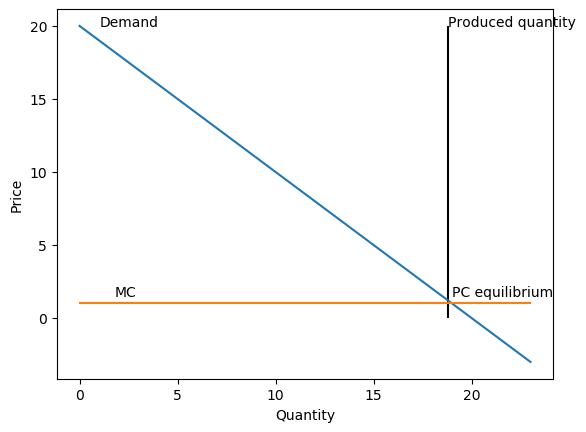

In [27]:
#We start by setting the values:
a = 20
b = 1
k = 1

N = 100 # Number of firms 

qi = sm.symbols('q_i') #quantity of the i firm 


Solution = mpy.solution_cournot(N,qi,a,b,k)
print('\n The total quantity is: ' + str(round(Solution[1],2)))
print('\n The price is: ' + str(round(Solution[2],2)))
print('\n The quantity for firm i is: ' + str(round(Solution[3],2)))
print('\n The the profit for firm i is: ' + str(round(Solution[4],2)))  

pcquantity = mpy.perfect_com(qi,N,a,b,k)
print('\n The quantity for perfect competition: ' + str(round(pcquantity[0])))
loss = mpy.plot_deadweight_loss(N,qi,a,b,k)